In [1]:
import pandas as pd
import seaborn as sns

computers = pd.read_csv("Data/Computers.csv")

In [2]:
computers.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


In [3]:
computers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   price    6259 non-null   int64 
 1   speed    6259 non-null   int64 
 2   hd       6259 non-null   int64 
 3   ram      6259 non-null   int64 
 4   screen   6259 non-null   int64 
 5   cd       6259 non-null   object
 6   multi    6259 non-null   object
 7   premium  6259 non-null   object
 8   ads      6259 non-null   int64 
 9   trend    6259 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 489.1+ KB


<Axes: xlabel='price', ylabel='Count'>

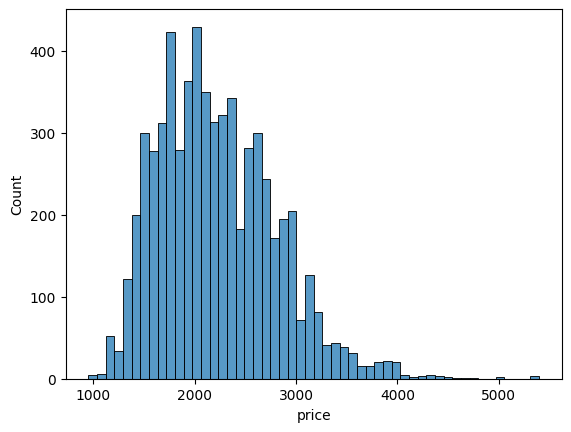

In [4]:
sns.histplot(x=computers["price"])

<Axes: xlabel='price'>

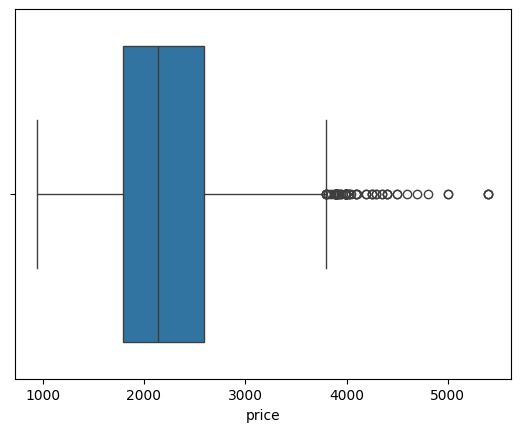

In [5]:
sns.boxplot(x=computers["price"])

In [12]:
price = computers["price"]
Q1 = price.quantile(0.25)
Q3 = price.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [15]:
print(f"Outliers < {lower_bound:.2f} lub > {upper_bound:.2f}")

Outliers < 592.50 lub > 3796.50


In [21]:
print((price[price > 3796.50]).count())

75


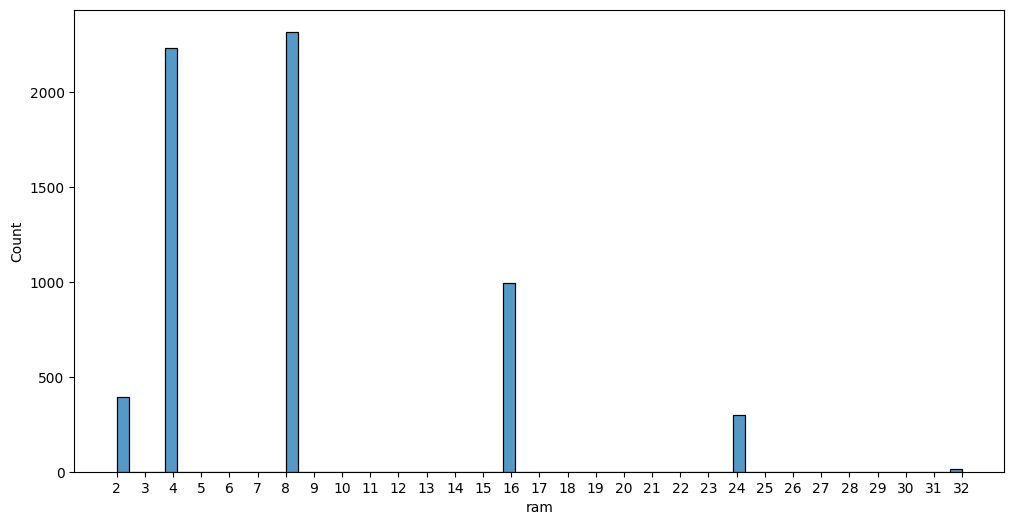

In [29]:
import matplotlib.pyplot as plt
import numpy as np
ram = computers["ram"]
plt.figure(figsize=(12,6))
sns.histplot(ram)
plt.xticks(np.arange(ram.min(), ram.max() + 1, 1))
plt.show()

In [31]:
ram.value_counts()

ram
8     2320
4     2236
16     996
2      394
24     297
32      16
Name: count, dtype: int64

Text(0, 0.5, 'Number of computers')

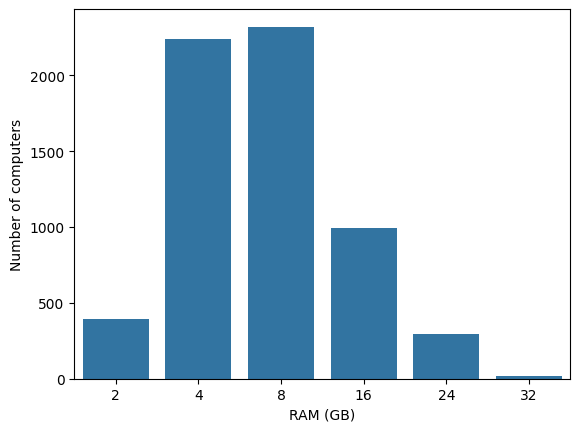

In [35]:
sns.countplot(x="ram", data=computers, order=sorted(ram.unique()))
plt.xlabel("RAM (GB)")
plt.ylabel("Number of computers")

Text(0, 0.5, 'Number of computers')

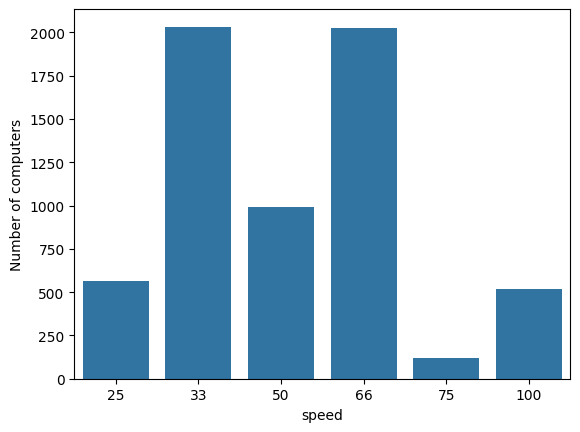

In [39]:
speed = computers["speed"]
sns.countplot(x="speed", data=computers, order=sorted(speed.unique()))
plt.ylabel("Number of computers")

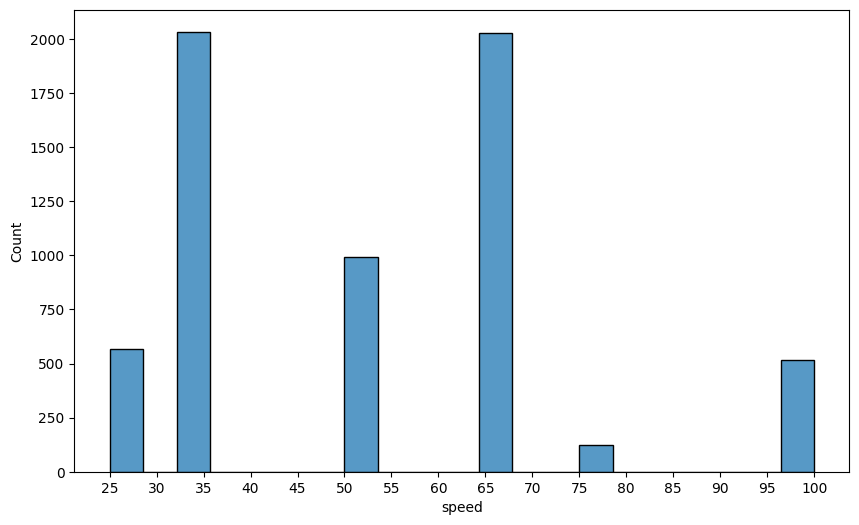

In [46]:
plt.figure(figsize=(10,6))
sns.histplot(speed)
plt.xticks(np.arange(speed.min(), speed.max() + 1, 5))
plt.show()

<Axes: >

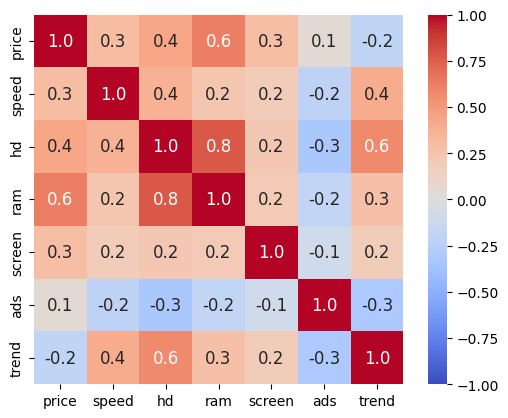

In [53]:
# Checking correlations
sns.heatmap(computers.corr(numeric_only=True), vmin=-1, vmax=1, fmt='.1f', cbar=True, square=True, annot=True, annot_kws={'size':12}, cmap="coolwarm")

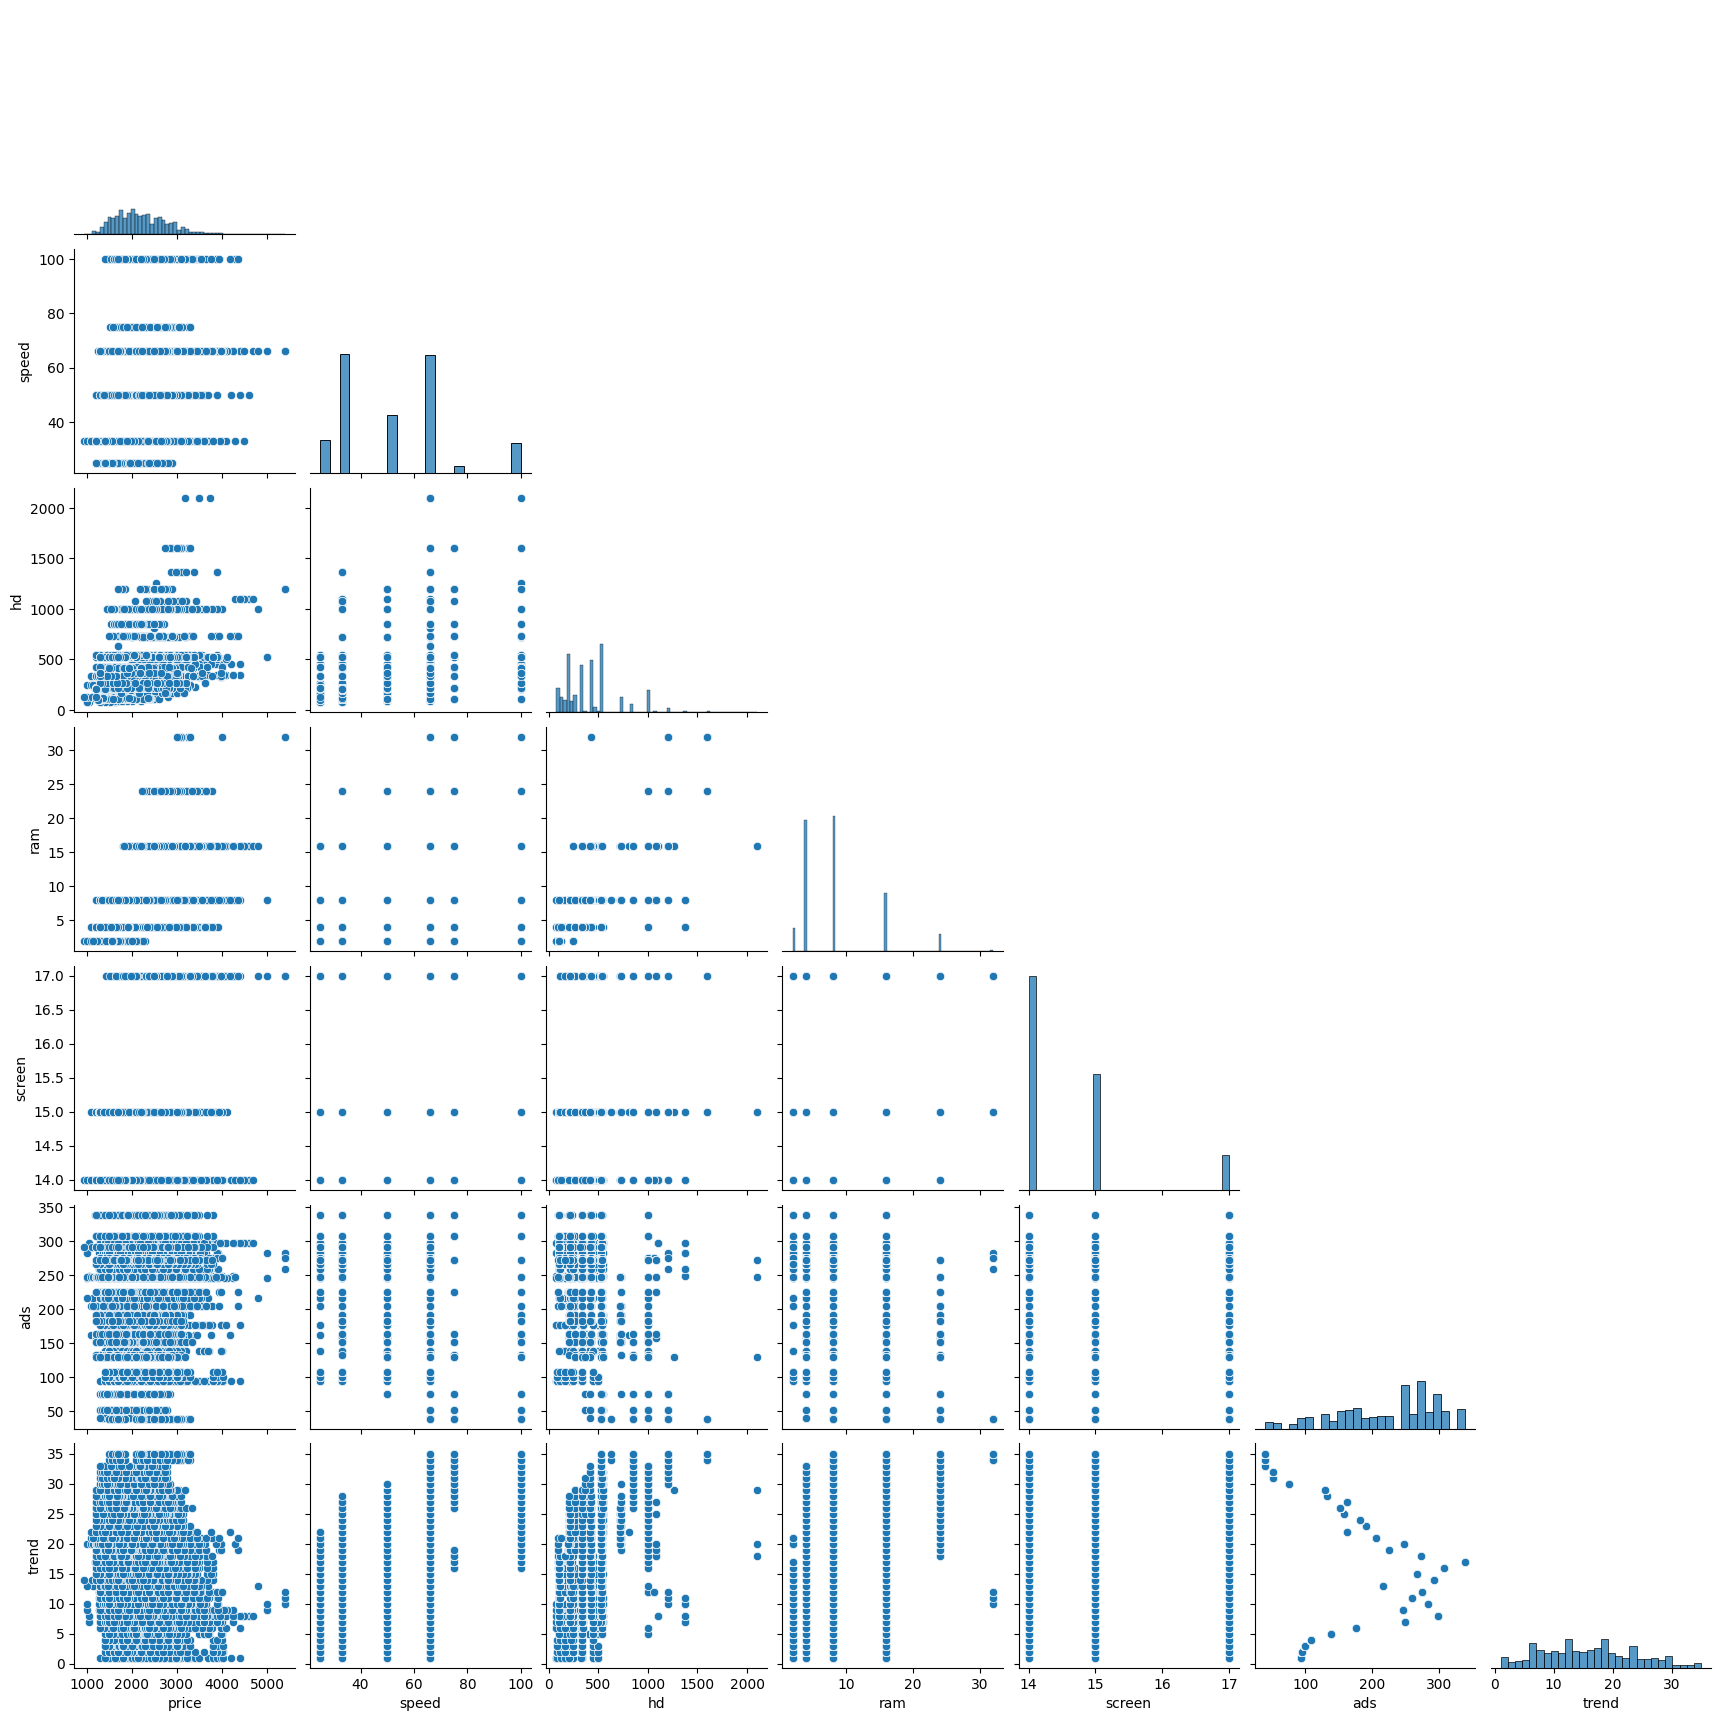

In [51]:
sns.pairplot(computers, corner=True)

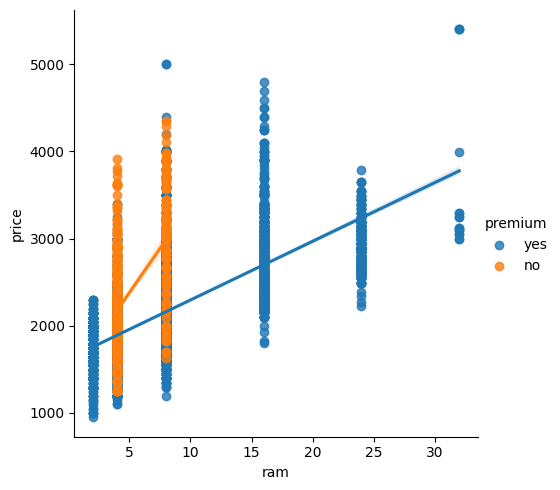

In [54]:
sns.lmplot(computers, x="ram", y="price", hue="premium")

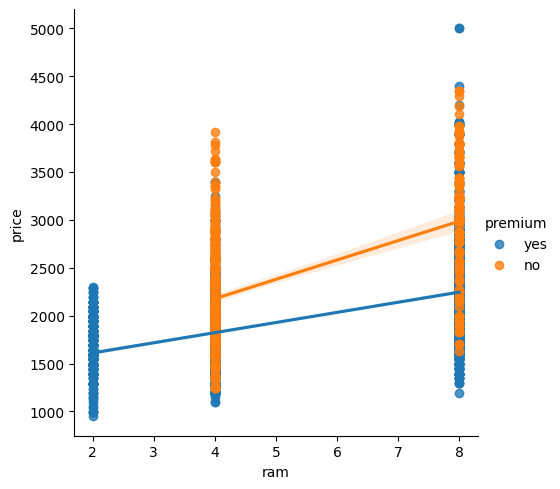

In [55]:
sns.lmplot(computers.query("ram < 11"), x="ram", y="price", hue="premium")

In [58]:
computers.corr(numeric_only=True)

,price,speed,hd,ram,screen,ads,trend
price,1.000000,0.300976,0.430258,0.622748,0.296041,0.054540,-0.199987
speed,0.300976,1.000000,0.372304,0.234760,0.189074,-0.215232,0.405438
hd,0.430258,0.372304,1.000000,0.777726,0.232802,-0.323222,0.577790
ram,0.622748,0.234760,0.777726,1.000000,0.208954,-0.181670,0.276844
screen,0.296041,0.189074,0.232802,0.208954,1.000000,-0.093919,0.188614
ads,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,1.000000,-0.318553
trend,-0.199987,0.405438,0.577790,0.276844,0.188614,-0.318553,1.000000


In [59]:
# Building regression model with target = "price" and the feauter with the strongest correlation to price
import statsmodels.api as sm
X = sm.add_constant(computers["ram"])
y = computers["price"]
model = sm.OLS(y, X).fit()

In [61]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     3964.
Date:                Mon, 25 Aug 2025   Prob (F-statistic):               0.00
Time:                        17:41:20   Log-Likelihood:                -47180.
No. Observations:                6259   AIC:                         9.436e+04
Df Residuals:                    6257   BIC:                         9.438e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1687.2925     10.221    165.073      0.000    1667.255    1707.330
ram           64.2316      1.020     62.959      0.000      62.232      66.232
==============================================================================
Omnibus:                     1327.783   Durbin-Watson:                   1.533
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3113.140
Skew:                           1.188   Prob(JB):                         0.00
Kurtosis:                       5.508   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
computers["ram"].unique()

array([ 4,  2,  8, 16, 32, 24])

In [94]:
computers_ram = [2, 4, 8, 16, 32, 64]

In [95]:
X_predict = sm.add_constant(pd.DataFrame({"ram": computers_ram}))
price_predictions = model.predict(X_predict)
price_predictions.name = "price_predictions"

In [96]:
price_predictions

0    1815.755790
1    1944.219043
2    2201.145550
3    2714.998564
4    3742.704591
5    5798.116644
Name: price_predictions, dtype: float64

In [83]:
(computers
     .query("ram in @computers_ram")
     .groupby("ram")
     .agg({"price": "mean"})
     .reset_index()
     .merge(price_predictions, left_index=True, right_index=True)
     .assign(
         error = lambda x: x["price_predictions"] - x["price"]
     )
)
    

,ram,price,price_predictions,error
0,2,1703.253807,1944.219043,240.965236
1,4,1873.067084,1815.755790,-57.311294
2,8,2298.154741,2201.145550,-97.009191
3,16,2782.691767,2714.998564,-67.693203
4,24,2936.016835,3742.704591,806.687756
5,32,3612.062500,3228.851577,-383.210923


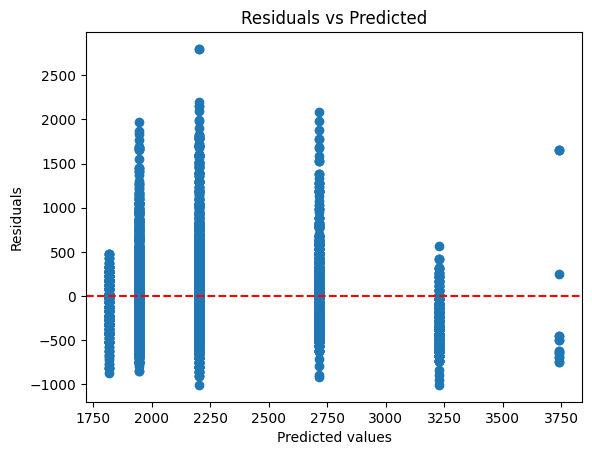

In [84]:
import matplotlib.pyplot as plt

plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()


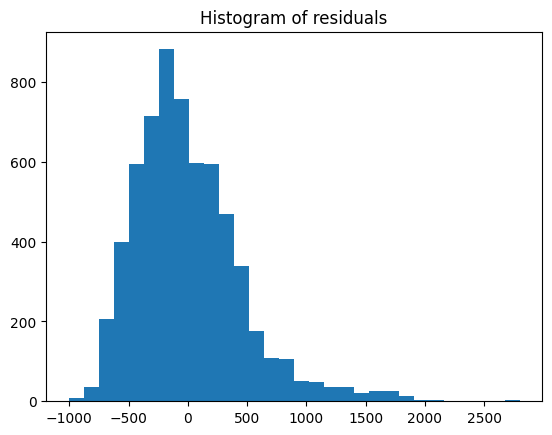

In [85]:
plt.hist(model.resid, bins=30)
plt.title("Histogram of residuals")
plt.show()


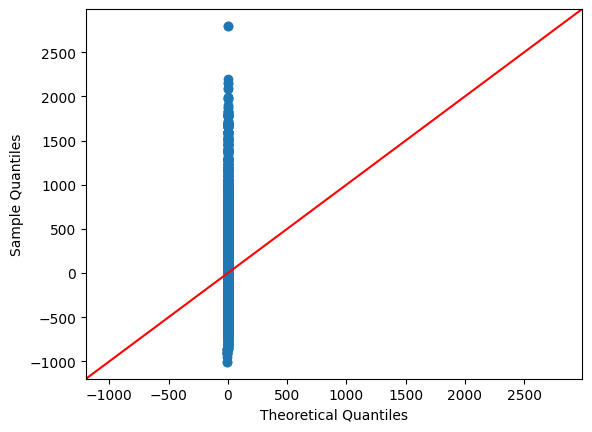

In [86]:
import statsmodels.api as sm
sm.qqplot(model.resid, line='45')
plt.show()
